### <span style="color:darkblue"> Lab Assignement 5: Unsupervised Learning </span>
- due Friday, November 17 @7PM
- post to your Google Drive folder using the file name: LASTNAME_lab5.ipynb

#### TYPE YOUR FULL NAME HERE: 

Riva Lam




##### Grade (to be entered by TA):

---
### <span style="color:darkblue"> Question 1.

(MDSR Exercise 9.2) Carry out and interpret a hierarchical cluster of vehicles from another manufacturer using the approach outlines in Section 9.1.1.

#### SOLUTION:

Observations: 7
Variables: 7
$ make         <fctr> Ferrari, Ferrari, Ferrari, Ferrari, Ferrari, Ferrari,...
$ model        <fctr> 488 GTB, 488 Spider, F12, F12 tdf, F60 America, Calif...
$ displacement <dbl> 3.9, 3.9, 6.3, 6.3, 6.3, 3.9, 6.3
$ cylinders    <int> 8, 8, 12, 12, 12, 8, 12
$ gears        <int> 7, 7, 7, 7, 7, 7, 7
$ city_mpg     <int> 15, 15, 11, 12, 12, 16, 11
$ hwy_mpg      <int> 22, 22, 16, 17, 15, 23, 17


Warning message in dist(cars):
“NAs introduced by coercion”

Class 'dist'  atomic [1:21] 0 10.16 8.84 10.57 1.67 ...
  ..- attr(*, "Size")= int 7
  ..- attr(*, "Labels")= chr [1:7] "488 GTB" "488 Spider" "F12" "F12 tdf" ...
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language dist(x = cars)


,488 GTB,488 Spider,F12,F12 tdf,F60 America,California T,FF
488 GTB,0.00,0.00,10.16,8.84,10.57,1.67,9.37
488 Spider,0.00,0.00,10.16,8.84,10.57,1.67,9.37
F12,10.16,10.16,0.00,1.67,1.67,11.58,1.18
F12 tdf,8.84,8.84,1.67,0.00,2.37,10.16,1.18
F60 America,10.57,10.57,1.67,2.37,0.00,11.94,2.65
California T,1.67,1.67,11.58,10.16,11.94,0.00,10.76
FF,9.37,9.37,1.18,1.18,2.65,10.76,0.00



The downloaded binary packages are in
	/var/folders/nw/47dlbfmj3g14bkrlz_z6m7vh0000gn/T//Rtmp8zFmNf/downloaded_packages


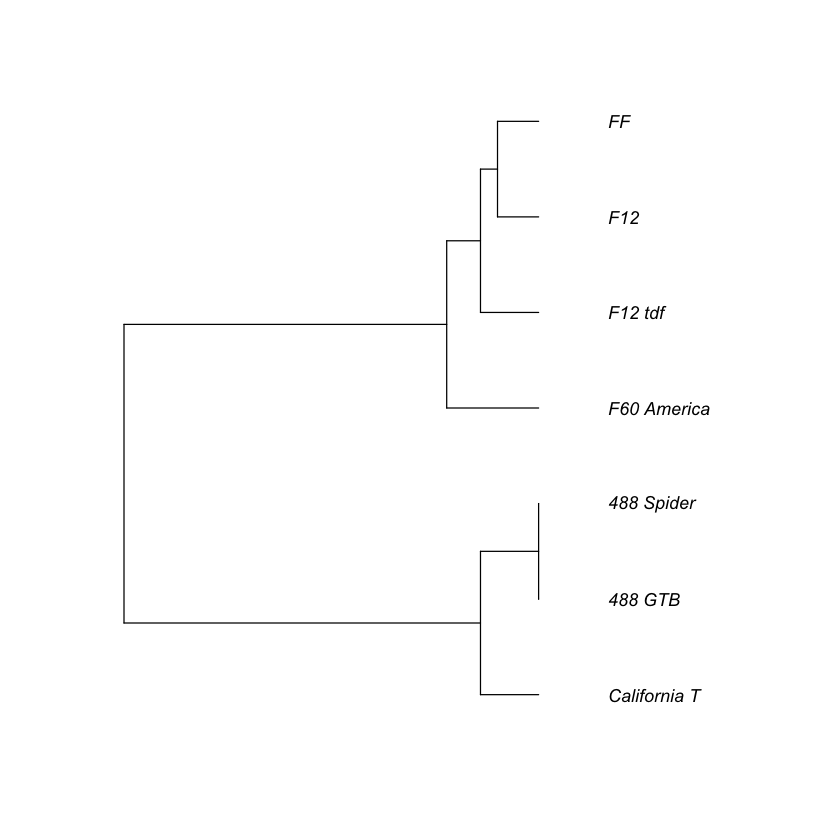

In [4]:
#code solution goes here

library(dplyr)
library(mdsr)
library(mosaic)
library(mdsr)
library(readxl)
cars<-read.csv("2016 FE Guide for DOE-OK to release-no-sales-4-27-2017VW3.0_public - FEguide.csv")
cars<-cars %>% rename(make=Mfr.Name, model=Carline, displacement=Eng.Displ,cylinders=X..Cyl,
                   city_mpg= City.FE..Guide....Conventional.Fuel,
                    hwy_mpg= Hwy.FE..Guide....Conventional.Fuel, 
                    gears= X..Gears)%>%
    select(make, model,displacement,cylinders, gears,city_mpg,hwy_mpg)%>%
    distinct(model, .keep_all=TRUE) %>%
    filter(make=="Ferrari")
rownames(cars)<-cars$model
glimpse(cars)
car_diffs<-dist(cars)   #distance between each car. 
str(car_diffs) #structure 

car_mat<-car_diffs%>%as.matrix()
car_mat[1:7,1:7]%>%round(digits=2)
install.packages("ape")
library(ape)
library()
car_diffs %>% hclust()%>%as.phylo()%>%plot(cex=0.9,label.offset=1)


#What do these clusterings mean?
names(cars )


In [5]:
cars

,make,model,displacement,cylinders,gears,city_mpg,hwy_mpg
488 GTB,Ferrari,488 GTB,3.9,8,7,15,22
488 Spider,Ferrari,488 Spider,3.9,8,7,15,22
F12,Ferrari,F12,6.3,12,7,11,16
F12 tdf,Ferrari,F12 tdf,6.3,12,7,12,17
F60 America,Ferrari,F60 America,6.3,12,7,12,15
California T,Ferrari,California T,3.9,8,7,16,23
FF,Ferrari,FF,6.3,12,7,11,17


FF and F12 are very similar to one another (close distance) so that is one cluster.
F12 tdf is similar to the cluster of FF and F12. F60 America is dismilar to the two
to F12 tdf but moreso in comparison to FF and F12.

488 Spider and 488 GTB are similar. That is one cluster, and California T is similar to that 
cluster. 

FF, FF12, and F12 tdf are more similar to each other than 488 Spider, 488 GTB, and California T.

California T is disimilar to 488 GTB and 488 Spider. 

---
### <span style="color:darkblue"> Question 2.

(MDSR Exercise 9.4) Re-fit the k-means algorithm on the BigCities data with a different value of k (i.e. not six).  Experiment with different values of k and report on the sensitivity of the algorithm to changes in this parameter. 

#### SOLUTION:

In [33]:
#code solution goes here
library(dplyr)
library(mdsr)
library(mosaic)
library(ggplot2)
library(tidyr)
WorldCities<- read.csv("worldCities.csv")
attach(WorldCities)
BigCities<-WorldCities %>%
      arrange(desc(population)) %>%
       head(4000) %>%
        select(longitude,latitude)


BigCities 
set.seed(15)
install.packages("mclust")
library(mclust)




The following objects are masked from WorldCities (pos = 5):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, regionCode, X

The following objects are masked from WorldCities (pos = 6):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, regionCode, X

The following objects are masked from WorldCities (pos = 7):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, regionCode, X

The following objects are masked from WorldCities (pos = 8):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, regionCode, X

The following objects are masked from WorldCities (pos = 9):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, regionCode, X

The following objects are masked from WorldCities (pos = 11):

    code, country, countryRegion, date, latitude, longitude, name,
    population, region, region

longitude,latitude
121.45806,31.22222
-58.37723,-34.61315
72.88261,19.07283
-99.12766,19.42847
67.08220,24.90560
28.94966,41.01384
77.22897,28.65381
120.98220,14.60420
37.61556,55.75222
90.40744,23.71040



The downloaded binary packages are in
	/var/folders/nw/47dlbfmj3g14bkrlz_z6m7vh0000gn/T//RtmpKnefe0/downloaded_packages


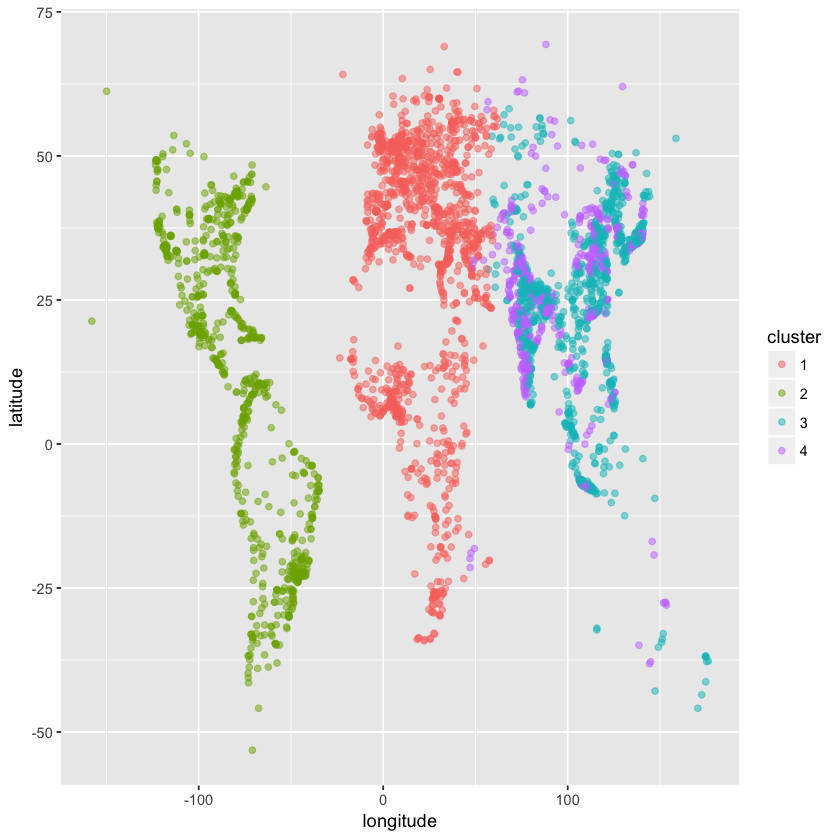

In [37]:
city_clusts<-BigCities %>%
            kmeans(centers=4) %>%
            fitted("classes") %>%
            as.character()
BigCities<- BigCities %>% mutate(cluster=city_clusts)
BigCities%>% ggplot(aes(x=longitude,y=latitude))+
  geom_point(aes(color=cluster),alpha=0.5)

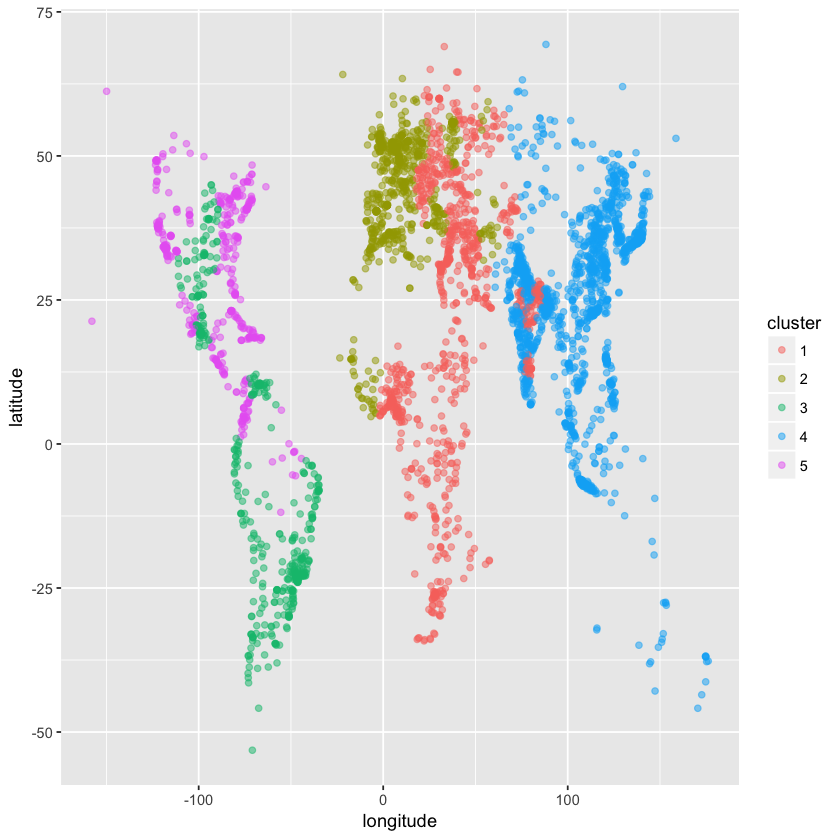

In [39]:
library(dplyr)
library(mdsr)
library(ggplot2)

city_clusts5<-BigCities %>%
            kmeans(centers=5) %>%
            fitted("classes") %>%
            as.character()
BigCities<- BigCities %>% mutate(cluster=city_clusts5)
BigCities%>% ggplot(aes(x=longitude,y=latitude))+
  geom_point(aes(color=cluster),alpha=0.5)

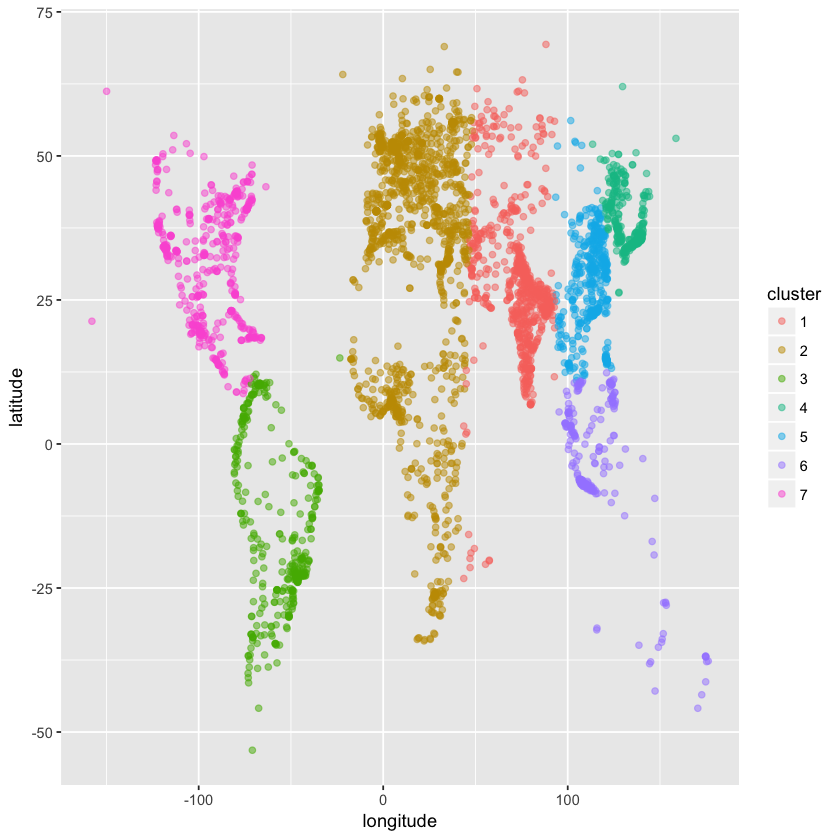

In [29]:
library(dplyr)
library(mdsr)
library(ggplot2)

city_clusts7<-BigCities %>%
            kmeans(centers=7) %>%
            fitted("classes") %>%
            as.character()
BigCities<- BigCities %>% mutate(cluster=city_clusts7)
BigCities%>% ggplot(aes(x=longitude,y=latitude))+
  geom_point(aes(color=cluster),alpha=0.5)

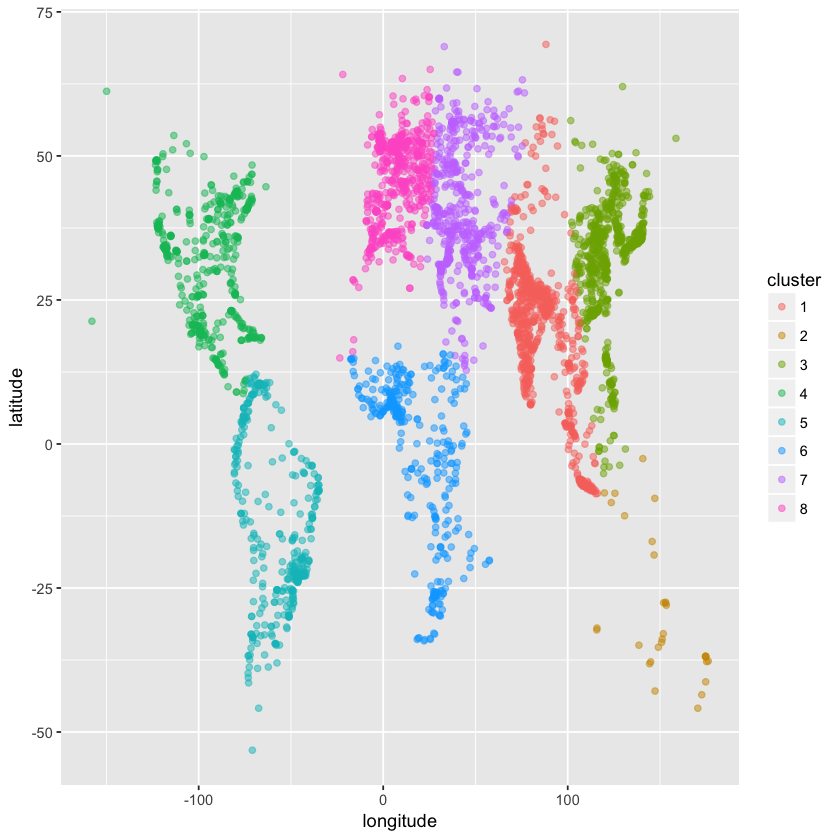

In [43]:
library(dplyr)
library(mdsr)
library(ggplot2)

city_clusts8<-BigCities %>%
            kmeans(centers=8) %>%
            fitted("classes") %>%
            as.character()
BigCities<- BigCities %>% mutate(cluster=city_clusts8)
BigCities%>% ggplot(aes(x=longitude,y=latitude))+
  geom_point(aes(color=cluster),alpha=0.5)

#### Solution in words goes here
Experiment with different values of k and report on the sensitivity of the algorithm to changes in this parameter.

The number of colored clusters is equal to whatever k is. By increasing k, we see that the size of each colored cluster gets smaller and smaller. When k is decreased, the size for each one increases. The outline of the some of the continents are still somwhat the same but as k increases, more colors make up the continents due to clustering. 

k = 4
k=5

k=7
k=8

In [7]:
cars<-read.csv("2016 FE Guide for DOE-OK to release-no-sales-4-27-2017VW3.0_public - FEguide.csv")
names(cars)

[1] "Model.Year"                                                                                              
  [2] "Mfr.Name"                                                                                                
  [3] "Division"                                                                                                
  [4] "Carline"                                                                                                 
  [5] "Verify.Mfr.Cd"                                                                                           
  [6] "Index..Model.Type.Index."                                                                                
  [7] "Eng.Displ"                                                                                               
  [8] "X..Cyl"                                                                                                  
  [9] "Transmission"                                                                                            
 [10] "City.FE..Guide....Conventional.Fuel"                                                                     
 [11] "Hwy.FE..Guide....Conventional.Fuel"                                                                      
 [12] "Comb.FE..Guide....Conventional.Fuel"                                                                     
 [13] "City.Unadj.FE...Conventional.Fuel"                                                                       
 [14] "Hwy.Unadj.FE...Conventional.Fuel"                                                                        
 [15] "Comb.Unadj.FE...Conventional.Fuel"                                                                       
 [16] "City.Unrd.Adj.FE...Conventional.Fuel"                                                                    
 [17] "Hwy.Unrd.Adj.FE...Conventional.Fuel"                                                                     
 [18] "Comb.Unrd.Adj.FE...Conventional.Fuel"                                                                    
 [19] "Guzzler."                                                                                                
 [20] "Air.Aspir.Method"                                                                                        
 [21] "Air.Aspiration.Method.Desc"                                                                              
 [22] "Trans"                                                                                                   
 [23] "Trans.Desc"                                                                                              
 [24] "Trans..Other"                                                                                            
 [25] "X..Gears"                                                                                                
 [26] "Lockup.Torque.Converter"                                                                                 
 [27] "Trans.Creeper.Gear"                                                                                      
 [28] "Drive.Sys"                                                                                               
 [29] "Drive.Desc"                                                                                              
 [30] "Max.Ethanol.....Gasoline"                                                                                
 [31] "Max.Biodiesel.."                                                                                         
 [32] "Range1...Model.Type.Driving.Range...Conventional.Fuel"                                                   
 [33] "Fuel.Usage....Conventional.Fuel"                                                                         
 [34] "Fuel.Usage.Desc...Conventional.Fuel"                                                                     
 [35] "Fuel.Unit...Conventional.Fuel"                                                                           
 [36] "Fuel.Unit.Desc...Conventional.Fuel"     